In [1]:
import mysql.connector
from mysql.connector import Error
import pandas as pd

# MySQL database connection function
def connect_to_database():
    try:
        # Establishing connection to the database
        connection = mysql.connector.connect(
            host='crypto-matter.c5eq66ogk1mf.eu-central-1.rds.amazonaws.com',
            database='Crypto',
            user='Nasim',  # Replace with your actual first name
            password='Crypto12!'
        )

        if connection.is_connected():
            db_info = connection.get_server_info()
            print("Connected to MySQL database, MySQL Server version: ", db_info)
            return connection

    except Error as e:
        print("Error while connecting to MySQL", e)
        return None


# Function to query merged data from crypto_lending_borrowing and crypto_price tables
def query_merged_crypto_data(connection):
    query = """
    SELECT clb.*, cp.*
    FROM crypto_lending_borrowing clb
    JOIN crypto_price cp 
        ON clb.crypto_symbol = cp.crypto_symbol
        AND clb.date = cp.date
    WHERE UPPER(clb.crypto_symbol) IN ('1INCHUSDT', 'BALUSDT', 'BATUSDT', 'CRVUSDT', 'ENJUSDT', 'ENSUSDT', 'KNCUSDT', 'LINKUSDT', 'MANAUSDT', 'MKRUSDT', 'RENUSDT', 'SNXUSDT', 'UNIUSDT', 'WBTCUSDT', 'YFIUSDT', 'ZRXUSDT')
    """
    cursor = connection.cursor()

    try:
        # Execute the query
        cursor.execute(query)

        # Fetch all results
        results = cursor.fetchall()

        # Get column names from cursor description
        columns = [desc[0] for desc in cursor.description]

        # Convert results to a Pandas DataFrame
        df = pd.DataFrame(results, columns=columns)

        return df

    except Error as e:
        print(f"Error: {e}")
        return None
    finally:
        cursor.close()

# Function to close the database connection
def query_quit(connection):
    if connection.is_connected():
        connection.close()
        print("MySQL connection is closed")


connection = connect_to_database()

if connection:
    # Query merged data
    merged_df = query_merged_crypto_data(connection)

    if merged_df is not None and not merged_df.empty:
        # Display first few rows of the DataFrame
        print("\nMerged DataFrame:")
        print(merged_df.head())

        # Save DataFrame to CSV
        merged_df.to_csv('merged_crypto_data.csv', index=False)
        print("\nMerged data saved to 'merged_crypto_data.csv'")
    else:
        print("\nNo data found after merging.")

    # Close the connection
    query_quit(connection)


Connected to MySQL database, MySQL Server version:  8.0.39

Merged DataFrame:
   id crypto_symbol                date lending_rate borrowing_rate  \
0   1       BATUSDT 2020-12-02 14:00:00   -50.000000     -50.000000   
1   2       BATUSDT 2020-12-02 15:00:00   -50.000000     -50.000000   
2   3       BATUSDT 2020-12-02 16:00:00   -50.000000     -50.000000   
3   4       BATUSDT 2020-12-02 17:00:00   -50.000000     -50.000000   
4   5       BATUSDT 2020-12-02 18:00:00   -50.000000     -50.000000   

  utilization_rate stable_borrow_rate crypto_symbol                date  high  \
0       -50.000000           0.030000       BATUSDT 2020-12-02 14:00:00  0.24   
1       -50.000000           0.030000       BATUSDT 2020-12-02 15:00:00  0.24   
2         0.013598           0.030000       BATUSDT 2020-12-02 16:00:00  0.24   
3         0.014834           0.030000       BATUSDT 2020-12-02 17:00:00  0.24   
4         0.014834           0.030000       BATUSDT 2020-12-02 18:00:00  0.25   

    low 

In [2]:
import os
print("Current Working Directory:", os.getcwd())

Current Working Directory: /Users/nasimzarei/9-crypto matter


In [23]:
import pandas as pd

# Load the CSV file into a Pandas DataFrame
data = pd.read_csv('merged_crypto_data.csv')

# Display basic information and first few rows to inspect the data
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487675 entries, 0 to 487674
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  487675 non-null  int64  
 1   crypto_symbol       487675 non-null  object 
 2   date                487675 non-null  object 
 3   lending_rate        487675 non-null  float64
 4   borrowing_rate      487675 non-null  float64
 5   utilization_rate    487675 non-null  float64
 6   stable_borrow_rate  487675 non-null  float64
 7   crypto_symbol.1     487675 non-null  object 
 8   date.1              487675 non-null  object 
 9   high                487675 non-null  float64
 10  low                 487675 non-null  float64
 11  close               487675 non-null  float64
 12  adj_close           487675 non-null  float64
 13  volume              487675 non-null  int64  
 14  market_cap          0 non-null       float64
 15  coin_supply         0 non-null    

In [24]:
# Convert 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Verify the conversion
print(data['date'].dtype) 


datetime64[ns]


In [25]:
# Replace all occurrences of -50.0 with 0.0 in the entire dataset
data.replace(-50.0, 0.0, inplace=True)

# Verify changes by inspecting the first few rows
print(data.head())


   id crypto_symbol                date  lending_rate  borrowing_rate  \
0   1       BATUSDT 2020-12-02 14:00:00           0.0             0.0   
1   2       BATUSDT 2020-12-02 15:00:00           0.0             0.0   
2   3       BATUSDT 2020-12-02 16:00:00           0.0             0.0   
3   4       BATUSDT 2020-12-02 17:00:00           0.0             0.0   
4   5       BATUSDT 2020-12-02 18:00:00           0.0             0.0   

   utilization_rate  stable_borrow_rate crypto_symbol.1               date.1  \
0          0.000000                0.03         BATUSDT  2020-12-02 14:00:00   
1          0.000000                0.03         BATUSDT  2020-12-02 15:00:00   
2          0.013598                0.03         BATUSDT  2020-12-02 16:00:00   
3          0.014834                0.03         BATUSDT  2020-12-02 17:00:00   
4          0.014834                0.03         BATUSDT  2020-12-02 18:00:00   

   high   low  close  adj_close   volume  market_cap  coin_supply  
0  0.24  0.2

In [27]:
data = data.drop(columns=['id', 'crypto_symbol.1', 'date.1'])

In [28]:
from sklearn.preprocessing import MinMaxScaler

# Select columns to normalize
numerical_columns = ['lending_rate', 'borrowing_rate', 'utilization_rate', 
                     'stable_borrow_rate', 'high', 'low', 'close', 'adj_close', 'volume']

scaler = MinMaxScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])


In [29]:
# Add features like hour, day, month, year
data['hour'] = data['date'].dt.hour
data['day'] = data['date'].dt.day
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year


In [30]:
# Create sequences for LSTM
def create_sequences(data, sequence_length, target_columns):
    sequences = []
    targets = []
    
    for i in range(len(data) - sequence_length):
        # Extract sequence of features
        seq = data.iloc[i:i + sequence_length][numerical_columns].values
        sequences.append(seq)
        
        # Extract targets for the next time step
        target = data.iloc[i + sequence_length][target_columns].values
        targets.append(target)
    
    return np.array(sequences), np.array(targets)

# Specify target columns
target_columns = ['lending_rate', 'borrowing_rate']

# Group by 'crypto_symbol' and create sequences
X, y = [], []
for symbol in data['crypto_symbol'].unique():
    symbol_data = data[data['crypto_symbol'] == symbol]
    symbol_X, symbol_y = create_sequences(symbol_data, sequence_length, target_columns)
    X.extend(symbol_X)
    y.extend(symbol_y)

X = np.array(X)
y = np.array(y)


In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [34]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (390012, 10, 9)
y_train shape: (390012, 2)


In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(sequence_length, X_train.shape[2])),
    LSTM(50, return_sequences=False),
    Dense(25, activation='relu'),
    Dense(2)  # Output layer for predicting lending_rate and borrowing_rate
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
12188/12188 ━━━━━━━━━━━━━━━━━━━━ 114s 9ms/step - loss: 9.7398e-06 - val_loss: 1.2574e-05
Epoch 2/20
12188/12188 ━━━━━━━━━━━━━━━━━━━━ 127s 10ms/step - loss: 5.9815e-06 - val_loss: 9.1979e-06
Epoch 3/20
12188/12188 ━━━━━━━━━━━━━━━━━━━━ 135s 11ms/step - loss: 9.5971e-06 - val_loss: 7.6313e-06
Epoch 4/20
12188/12188 ━━━━━━━━━━━━━━━━━━━━ 122s 10ms/step - loss: 4.0777e-06 - val_loss: 7.8852e-06
Epoch 5/20
12188/12188 ━━━━━━━━━━━━━━━━━━━━ 120s 10ms/step - loss: 5.2561e-06 - val_loss: 6.8231e-06
Epoch 6/20
12188/12188 ━━━━━━━━━━━━━━━━━━━━ 122s 10ms/step - loss: 8.1701e-06 - val_loss: 7.0354e-06
Epoch 7/20
12188/12188 ━━━━━━━━━━━━━━━━━━━━ 121s 10ms/step - loss: 4.5878e-06 - val_loss: 6.8067e-06
Epoch 8/20
12188/12188 ━━━━━━━━━━━━━━━━━━━━ 120s 10ms/step - loss: 7.1094e-06 - val_loss: 6.8637e-06
Epoch 9/20
12188/12188 ━━━━━━━━━━━━━━━━━━━━ 122s 10ms/step - loss: 5.7623e-06 - val_loss: 6.9419e-06
Epoch 10/20
12188/12188 ━━━━━━━━━━━━━━━━━━━━ 123s 10ms/step - loss: 6.2255e-06 - val_loss: 7

In [36]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")


3047/3047 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 5.9889e-06
Test Loss: 8.018531843845267e-06


3047/3047 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step


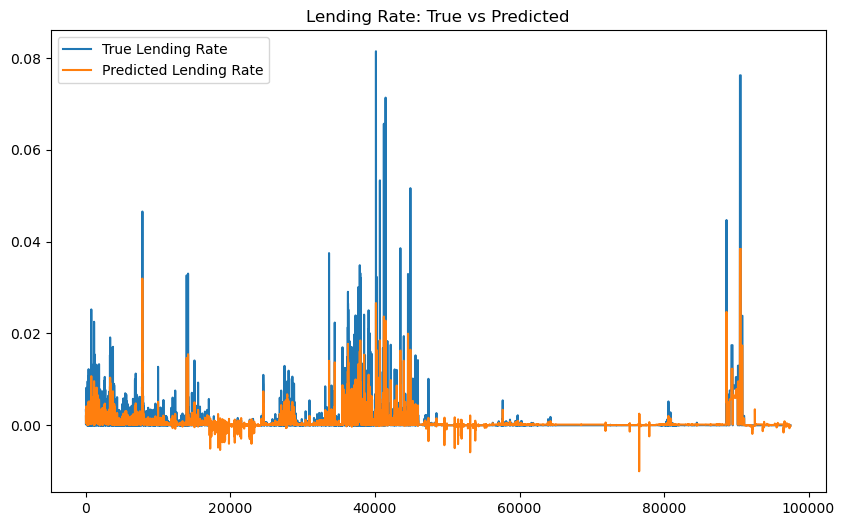

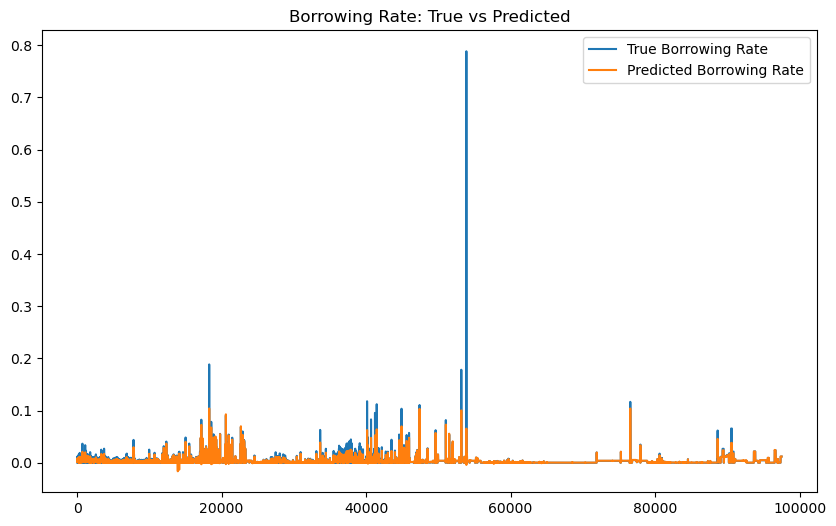

In [37]:
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = model.predict(X_test)

# Plot the true vs predicted values for lending_rate
plt.figure(figsize=(10, 6))
plt.plot(y_test[:, 0], label="True Lending Rate")
plt.plot(y_pred[:, 0], label="Predicted Lending Rate")
plt.legend()
plt.title("Lending Rate: True vs Predicted")
plt.show()

# Plot the true vs predicted values for borrowing_rate
plt.figure(figsize=(10, 6))
plt.plot(y_test[:, 1], label="True Borrowing Rate")
plt.plot(y_pred[:, 1], label="Predicted Borrowing Rate")
plt.legend()
plt.title("Borrowing Rate: True vs Predicted")
plt.show()
